<a href="https://colab.research.google.com/github/Starbish/FastAI-Course-1-Assignment/blob/main/lec1_classifier_for_shiba_and_bread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
	#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
# FastAI 과제로 빵과 시바견을 구분하는 모델을 만들어 볼 것임
# 기존의 ResNet50을 fine-tune 할 것
# 그걸 위해서는 빵과 시바견의 사진이 적당히 필요함.
# 왜 웰시코기가 아니라 시바견이냐면 내가 좋아하기 때문

## 이 기능을 쓰려고 했는데, ddg 검색 기능이 실행이 안됨..
## ddg 말고 아래의 unsplash를 이용하는 코드를 사용해보자...

from fastdownload import download_url
from fastai.vision.all import *
from pathlib import Path

search_terms = {
    "bread": "bread",
    "shiba": "shiba inu"
}

path = Path('images_finetune')
path.mkdir(exist_ok=True)

for label, term in search_terms.items():
    dest = (path/label)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(term, max_images=5)
    download_images(dest, urls=results)
    resize_images(dest, max_size=400, dest=dest)
    verify_images(dest, delete=True, max_size=400)


In [ ]:
# Unsplash를 사용하는 코드
from fastdownload import download_url
from fastai.vision.all import *
from pathlib import Path

search_terms = {
    "bread": "bread",
    "shiba": "shiba"
}

path = Path('images_finetune')
path.mkdir(exist_ok=True)

# GPT의 힘을 빌려 생성된 unsplash 탐색 코드
import requests
from pathlib import Path
from PIL import Image
from io import BytesIO

ACCESS_KEY = ??

def search_unsplash(query, count=30):
    url = "https://api.unsplash.com/search/photos"
    headers = {
        "Accept-Version": "v1",
        "Authorization": f"Client-ID {ACCESS_KEY}"
    }
    params = {
        "query": query,
        "per_page": count
    }

    response = requests.get(url, headers=headers, params=params)

    print("Status code:", response.status_code)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch images: {response.status_code} - {response.text}")

    data = response.json()
    return [result['urls']['regular'] for result in data.get('results', [])]

def download_images(urls, dest_dir):
    Path(dest_dir).mkdir(parents=True, exist_ok=True)
    for i, url in enumerate(urls):
        try:
            img_data = requests.get(url).content
            img = Image.open(BytesIO(img_data))
            img.save(Path(dest_dir)/f"{i}.jpg")
            print(f"Downloaded image {i+1}/{len(urls)}")
        except Exception as e:
            print(f"❌ Failed to download image {i}: {e}")


for label, term in search_terms.items():
    dest = (path/label)
    dest.mkdir(exist_ok=True)
    results = search_unsplash(term, count=0)
    download_images(results, dest)
    resize_images(dest, max_size=400, dest=dest)
    verify_images(dest)

Status code: 200
Downloaded image 1/30
Downloaded image 2/30
Downloaded image 3/30
Downloaded image 4/30
Downloaded image 5/30
Downloaded image 6/30
Downloaded image 7/30
Downloaded image 8/30
Downloaded image 9/30
Downloaded image 10/30
Downloaded image 11/30
Downloaded image 12/30
Downloaded image 13/30
Downloaded image 14/30
Downloaded image 15/30
Downloaded image 16/30
Downloaded image 17/30
Downloaded image 18/30
Downloaded image 19/30
Downloaded image 20/30
Downloaded image 21/30
Downloaded image 22/30
Downloaded image 23/30
Downloaded image 24/30
Downloaded image 25/30
Downloaded image 26/30
Downloaded image 27/30
Downloaded image 28/30
Downloaded image 29/30
Downloaded image 30/30
'PosixPath' object is not iterable
Status code: 200
Downloaded image 1/30
Downloaded image 2/30
Downloaded image 3/30
Downloaded image 4/30
Downloaded image 5/30
Downloaded image 6/30
Downloaded image 7/30
Downloaded image 8/30
Downloaded image 9/30
Downloaded image 10/30
Downloaded image 11/30
Downlo

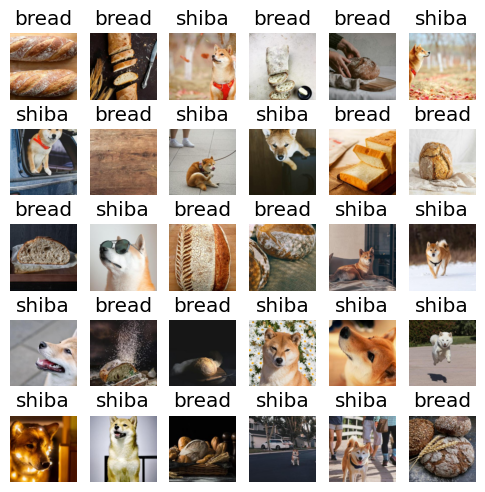

In [ ]:
# 이미지 다운로드 이후에는 이걸 이용해서 DLS(DataLoaders)를 만든다.
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct = 0.2,
    seed = 42,
    item_tfms = Resize(224),
    bs = 30,
)

dls.show_batch(max_n=30, figsize=(6,6))

In [ ]:
# 이런 간단한걸 만드는데 굳이 무거운 모델일 필요 없이 resnet34만 써도 충분할듯
model = vision_learner(dls, resnet34, metrics=error_rate)
model.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.030517,0.131274,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.894675,0.065260,0.000000,00:00
1,0.712116,0.012131,0.000000,00:00


In [ ]:
# 위 train_loss보다 훨씬 낮은 값이 실제 값임을 알 수 있음.
# 정확히 왜 위의 train loss 가 저렇게 높은지는 알 수 없지만, 어쨌든 실제의 train loss는 아래와 같음
model.validate(dl=dls.train)

(#2) [0.2302425503730774,0.1333332657814026]

In [ ]:
# 기왕 모델을 finetune 했으므로 실제로 써봐야지!
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
def what_is_this(x):
    return x.parents.name

def label_func(x):
    keys = list(search_terms.keys())
    return keys.index(x)


What is this?: shiba.
Confidence: 0.829271


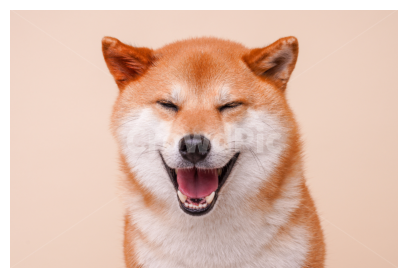

In [ ]:
img = PILImage.create(uploader.data[0])
img.show()
what_is_this ,_ ,probs = model.predict(img)
print(f"What is this?: {what_is_this}.")
print(f"Confidence: {probs[label_func(what_is_this)].item():.6f}")

What is this?: bread.
Confidence: 0.999244


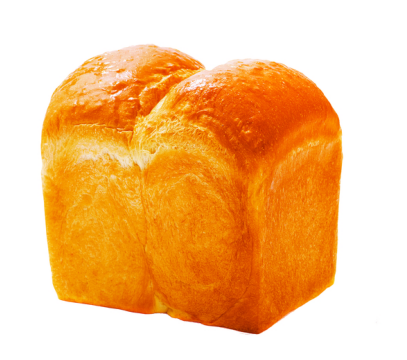

In [ ]:
img = PILImage.create(uploader.data[0])
img.show()
what_is_this ,_ ,probs = model.predict(img)
print(f"What is this?: {what_is_this}.")
print(f"Confidence: {probs[label_func(what_is_this)].item():.6f}")